##датасет: https://www.kaggle.com/datasets/nicolasgonzalezmunoz/world-bank-world-development-indicators

##Загрузка данных

In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alyonapozhidaeva","key":"5803cb3fc1310973a4c29c2c626029a8"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nicolasgonzalezmunoz/world-bank-world-development-indicators")

print("Path to dataset files:", path)

100%|██████████| 2.12M/2.12M [00:00<00:00, 111MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nicolasgonzalezmunoz/world-bank-world-development-indicators/versions/2


##импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


##быстрый обзор

In [ ]:
df.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,CO2_emisions,other_greenhouse_emisions,population_density,inflation_annual%,real_interest_rate,risk_premium_on_lending,research_and_development_expenditure%,central_goverment_debt%,tax_revenue%,expense%,goverment_effectiveness_estimate,goverment_effectiveness_std,human_capital_index,doing_business,time_to_get_operation_license,statistical_performance_indicators,individuals_using_internet%,logistic_performance_index,military_expenditure%,GDP_current_US,political_stability_estimate,political_stability_std,rule_of_law_estimate,rule_of_law_std,regulatory_quality_estimate,regulatory_quality_std,government_expenditure_on_education%,government_health_expenditure%,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.477056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.488889e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.751356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.466667e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.040239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.511112e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.343888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


смотрим информацию о структуре БД

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    17272 non-null  object 
 1   date                                       17272 non-null  object 
 2   agricultural_land%                         14714 non-null  float64
 3   forest_land%                               8176 non-null   float64
 4   land_area                                  14930 non-null  float64
 5   avg_precipitation                          10086 non-null  float64
 6   trade_in_services%                         9195 non-null   float64
 7   control_of_corruption_estimate             4783 non-null   float64
 8   control_of_corruption_std                  4783 non-null   float64
 9   access_to_electricity%                     7348 non-null   float64
 10  renewvable_energy_cons

In [ ]:
df.describe()

,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,CO2_emisions,other_greenhouse_emisions,population_density,inflation_annual%,real_interest_rate,risk_premium_on_lending,research_and_development_expenditure%,central_goverment_debt%,tax_revenue%,expense%,goverment_effectiveness_estimate,goverment_effectiveness_std,human_capital_index,doing_business,time_to_get_operation_license,statistical_performance_indicators,individuals_using_internet%,logistic_performance_index,military_expenditure%,GDP_current_US,political_stability_estimate,political_stability_std,rule_of_law_estimate,rule_of_law_std,regulatory_quality_estimate,regulatory_quality_std,government_expenditure_on_education%,government_health_expenditure%,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
count,14714.000000,8176.000000,1.493000e+04,10086.000000,9195.000000,4783.000000,4783.000000,7348.000000,8076.000000,7790.000000,7.408000e+03,7.408000e+03,14901.000000,10788.000000,4416.000000,2370.000000,2889.000000,2080.000000,5125.000000,4769.000000,4759.000000,4759.000000,601.000000,189.000000,371.000000,1237.000000,8044.000000,1407.000000,10122.000000,1.319800e+04,4820.000000,4820.000000,4873.000000,4873.000000,4761.000000,4761.000000,6107.000000,4938.000000,455.000000,2108.000000,16037.000000,16019.000000,15866.000000,1.666500e+04,1.653900e+04,4850.000000,4850.000000,4209.000000
mean,36.945264,32.408397,5.078664e+06,1214.021416,20.998956,-0.024874,0.203572,80.758176,31.029558,2885.204630,1.023986e+06,1.479215e+06,293.641600,20.044991,5.394660,5.924425,1.053972,59.577998,16.490135,26.684002,-0.027629,0.241203,0.569469,95.925926,30.845828,64.031937,24.495529,2.836785,2.775668,1.223794e+12,-0.024249,0.277791,-0.025139,0.204467,-0.027641,0.235115,4.296010,3.226953,27.058386,37.797249,28.203391,10.490354,64.254193,2.159737e+08,1.231026e+08,-0.021062,0.167144,8.035708
std,20.552401,23.355506,1.406167e+07,810.573031,23.260442,1.000047,0.087529,28.745226,29.858553,4103.108667,3.343747e+06,4.595984e+06,1497.836123,291.284618,15.594338,7.135596,0.933690,67.731872,7.309325,12.227282,0.995204,0.073525,0.145568,54.823361,28.935782,17.584497,29.817489,0.550179,2.886450,5.453493e+12,1.000026,0.076822,0.996165,0.102145,0.995139,0.074489,1.808388,2.268737,11.262910,8.835216,12.862546,5.358976,11.112156,7.102653e+08,4.087475e+08,0.998757,0.064188,12.026623
min,0.262821,0.000000,2.027000e+00,18.100000,0.621025,-1.936706,0.114062,0.533899,0.000000,5.548906,0.000000e+00,7.616981e+00,0.098625,-17.640424,-97.693477,-31.502949,0.005440,-1.170726,0.000059,0.000125,-2.439963,0.161779,0.286075,1.000000,1.200000,11.769583,0.000000,1.210000,0.000017,8.824744e+06,-3.312951,0.192247,-2.590877,0.124802,-2.547726,0.146468,0.000000,0.062211,2.370000,20.700000,5.000000,0.795000,11.995000,2.646000e+03,0.000000e+00,-2.313395,0.102437,0.000000
25%,20.454545,12.430556,2.164000e+04,591.000000,8.678157,-0.791694,0.147978,68.435427,5.065460,375.934172,2.260363e+03,1.047048e+04,19.651038,2.389467,1.688283,2.610833,0.317070,31.915589,11.614937,17.334294,-0.761427,0.199017,0.443490,49.000000,13.750000,52.250000,0.231414,2.437124,1.324836,2.434830e+09,-0.669395,0.228020,-0.800446,0.152170,-0.739144,0.188440,3.131605,1.522687,18.300000,31.200000,16.438000,6.976522,56.810602,9.940000e+05,4.295845e+05,-0.850328,0.126422,1.348194
50%,37.470745,30.765419,2.419300e+05,1110.000000,13.456865,-0.253887,0.172218,98.290939,20.989980,1331.112025,2.383475e+04,5.037271e+04,53.798816,4.918952,5.468423,4.607158,0.730717,51.201818,15.536623,25.604545,-0.170190,0.218169,0.574536,96.000000,21.867500,63.413750,8.383895,2.692000,2.049239,1.785744e+10,0.068447,0.249323,-0.168567,0.167924,-0.141745,0.212594,4.1383

##проверка данных

In [ ]:
df.dtypes

,0
country,object
date,object
agricultural_land%,float64
forest_land%,float64
land_area,float64
avg_precipitation,float64
trade_in_services%,float64
control_of_corruption_estimate,float64
control_of_corruption_std,float64
access_to_electricity%,float64


типы данных в целом корректные.
возможно стоит привести date к типу datetime, чтобы использовать данные в столбце как временной индекс.

In [ ]:
df.isna().mean().sort_values(ascending=False).to_frame("missing_rate").head(20)

,missing_rate
doing_business,0.989057
time_to_get_operation_license,0.978520
multidimensional_poverty_headcount_ratio%,0.973657
human_capital_index,0.965204
statistical_performance_indicators,0.928381
logistic_performance_index,0.918539
central_goverment_debt%,0.879574
gini_index,0.877953
risk_premium_on_lending,0.862784
research_and_development_expenditure%,0.832735


Пропусков очень много — для некоторых индикаторов пусто более чем в 90% случаев.
Такие признаки могут быть исключены или анализироваться точечно.
Также видно, что средний уровень пропусков по датасету довольно высокий — это нужно будет учитывать в профилировании качества данных.

In [ ]:
df.nunique().sort_values(ascending=False)#.head(20)

,0
population,16459
rural_population,15807
population_density,14766
life_expectancy_at_birth,14344
GDP_current_US,13089
birth_rate,11724
agricultural_land%,10880
death_rate,10290
military_expenditure%,9766
inflation_annual%,9577


Много столбцов имеют уникальные значения по каждой строке — ожидаемо для временных рядов.
Количество уникальных стран соответствует приблизительно количеству государств + территорий.
Столбец date имеет не так много уникальных значений, значит временной период ограничен.

In [ ]:
df.duplicated().sum()

np.int64(0)

Данные уже чисты с точки зрения полных дубликатов строк. Проверим уникальность пары (country, date)

In [ ]:
df.duplicated(subset=['country', 'date']).sum()

np.int64(0)

In [ ]:
df.groupby(["country", "date"]).size().sort_values(ascending=False)

country      date      
Zimbabwe     2023-01-01    1
Afghanistan  1960-01-01    1
             1961-01-01    1
             1962-01-01    1
             1963-01-01    1
                          ..
             1972-01-01    1
             1971-01-01    1
             1970-01-01    1
             1969-01-01    1
             1968-01-01    1
Length: 17272, dtype: int64

на одну страну и год приходится по одному ключу. значит данные корректны и не задублированы

In [ ]:
df.describe(include="all")

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,CO2_emisions,other_greenhouse_emisions,population_density,inflation_annual%,real_interest_rate,risk_premium_on_lending,research_and_development_expenditure%,central_goverment_debt%,tax_revenue%,expense%,goverment_effectiveness_estimate,goverment_effectiveness_std,human_capital_index,doing_business,time_to_get_operation_license,statistical_performance_indicators,individuals_using_internet%,logistic_performance_index,military_expenditure%,GDP_current_US,political_stability_estimate,political_stability_std,rule_of_law_estimate,rule_of_law_std,regulatory_quality_estimate,regulatory_quality_std,government_expenditure_on_education%,government_health_expenditure%,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
count,17272,17272,14714.000000,8176.000000,1.493000e+04,10086.000000,9195.000000,4783.000000,4783.000000,7348.000000,8076.000000,7790.000000,7.408000e+03,7.408000e+03,14901.000000,10788.000000,4416.000000,2370.000000,2889.000000,2080.000000,5125.000000,4769.000000,4759.000000,4759.000000,601.000000,189.000000,371.000000,1237.000000,8044.000000,1407.000000,10122.000000,1.319800e+04,4820.000000,4820.000000,4873.000000,4873.000000,4761.000000,4761.000000,6107.000000,4938.000000,455.000000,2108.000000,16037.000000,16019.000000,15866.000000,1.666500e+04,1.653900e+04,4850.000000,4850.000000,4209.000000
unique,274,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Zimbabwe,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,64,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,36.945264,32.408397,5.078664e+06,1214.021416,20.998956,-0.024874,0.203572,80.758176,31.029558,2885.204630,1.023986e+06,1.479215e+06,293.641600,20.044991,5.394660,5.924425,1.053972,59.577998,16.490135,26.684002,-0.027629,0.241203,0.569469,95.925926,30.845828,64.031937,24.495529,2.836785,2.775668,1.223794e+12,-0.024249,0.277791,-0.025139,0.204467,-0.027641,0.235115,4.296010,3.226953,27.058386,37.797249,28.203391,10.490354,64.254193,2.159737e+08,1.231026e+08,-0.021062,0.167144,8.035708
std,NaN,NaN,20.552401,23.355506,1.406167e+07,810.573031,23.260442,1.000047,0.087529,28.745226,29.858553,4103.108667,3.343747e+06,4.595984e+06,1497.836123,291.284618,15.594338,7.135596,0.933690,67.731872,7.309325,12.227282,0.995204,0.073525,0.145568,54.823361,28.935782,17.584497,29.817489,0.550179,2.886450,5.453493e+12,1.000026,0.076822,0.996165,0.102145,0.995139,0.074489,1.808388,2.268737,11.262910,8.835216,12.862546,5.358976,11.112156,7.102653e+08,4.087475e+08,0.998757,0.064188,12.026623
min,NaN,NaN,0.262821,0.000000,2.027000e+00,18.100000,0.621025,-1.936706,0.114062,0.533899,0.000000,5.548906,0.000000e+00,7.616981e+00,0.098625,-17.640424,-97.693477,-31.502949,0.005440,-1.170726,0.000059,0.000125,-2.439963,0.161779,0.286075,1.000000,1.200000,11.769583,0.000000,1.210000,0.000017,8.824744e+06,-3.312951,0.192247,-2.590877,0.124802,-2.547726,0.146468,0.000000,0.062211,2.370000,20.700000,5.000000,0.795000,11.995000,2.646000e+03,0.000000e+00,-2.313395,0.102437,0.000000
25%,NaN,NaN,20.454545,12.430556,2.164000e+04,591.000000,8.678157,-0.791694,0.147978,68.435427,5.065460,375.934172,2.260363e+03,1.047048e+04,19.651038,2.389467,1.688283,2.610833,0.31

In [ ]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
(df[numeric_cols] < 0).sum().sort_values(ascending=False).head(20)

,0
control_of_corruption_estimate,2790
goverment_effectiveness_estimate,2687
rule_of_law_estimate,2686
regulatory_quality_estimate,2611
voice_and_accountability_estimate,2385
political_stability_estimate,2274
real_interest_rate,770
inflation_annual%,543
risk_premium_on_lending,88
central_goverment_debt%,1


отрицательные значения есть только в тех ячейках, где они и предполагаются, например инфляция. значит аномалий с неположенными отрицательными значениями не обнаружено.

In [ ]:
df.groupby("date").size().sort_values()

,0
date,
1960-01-01,266
1961-01-01,266
1962-01-01,266
1963-01-01,266
1964-01-01,266
...,...
2016-01-01,274
2019-01-01,274
2018-01-01,274


покрытие данных по дате более-менее равномерное. значит для анализа подходят как более ранние, так и поздние даты, т.к. информации достаточно

#функция автоматической проверки качества БД

In [ ]:
import pandas as pd
import numpy as np

def check_data_quality(
    df: pd.DataFrame,
    key_columns=None,
    critical_columns=None,         # столбцы, где пропуски недопустимы
    date_columns=None,             # столбцы, которые должны содержать корректные даты
    non_negative_columns=None      # столбцы, которые должны содержать только положительные значения
):
    report = {}


    report["DUPLICATE_ROWS"] = df.duplicated().sum()

    if key_columns:
        report["DUPLICATE_KEYS"] = df.duplicated(subset=key_columns).sum()
    else:
        report["DUPLICATE_KEYS"] = "key not provided"

    report["MISSING_VALUES"] = df.isna().sum().to_dict()

    if critical_columns:
        report["CRITICAL_MISSING"] = {
            col: df[col].isna().sum() for col in critical_columns
        }
    else:
        report["CRITICAL_MISSING"] = "critical columns not provided"

    if date_columns:
        date_issues = {}
        for col in date_columns:
            try:
                converted = pd.to_datetime(df[col], errors="coerce")
                date_issues[col] = converted.isna().sum()
            except Exception:
                date_issues[col] = "cannot parse"
        report["DATE_ISSUE"] = date_issues
    else:
        report["DATE_ISSUE"] = "date columns not provided"

    if non_negative_columns:
        negative_issues = {
            col: (df[col] < 0).sum() for col in non_negative_columns
        }
        report["NEG_VALUES"] = negative_issues
    else:
        report["NEG_VALUES"] = "non-negative columns not provided"

    return report


вводим данные для тестирования функции

In [ ]:
quality_report = check_data_quality(
    df,
    key_columns=["country", "date"],
    critical_columns=["population", "rural_population"],
    date_columns=["date"],
    non_negative_columns=["birth_rate", "death_rate"]
)


In [ ]:
quality_report

{'DUPLICATE_ROWS': np.int64(0),
 'DUPLICATE_KEYS': np.int64(0),
 'MISSING_VALUES': {'country': 0,
  'date': 0,
  'agricultural_land%': 2558,
  'forest_land%': 9096,
  'land_area': 2342,
  'avg_precipitation': 7186,
  'trade_in_services%': 8077,
  'control_of_corruption_estimate': 12489,
  'control_of_corruption_std': 12489,
  'access_to_electricity%': 9924,
  'renewvable_energy_consumption%': 9196,
  'electric_power_consumption': 9482,
  'CO2_emisions': 9864,
  'other_greenhouse_emisions': 9864,
  'population_density': 2371,
  'inflation_annual%': 6484,
  'real_interest_rate': 12856,
  'risk_premium_on_lending': 14902,
  'research_and_development_expenditure%': 14383,
  'central_goverment_debt%': 15192,
  'tax_revenue%': 12147,
  'expense%': 12503,
  'goverment_effectiveness_estimate': 12513,
  'goverment_effectiveness_std': 12513,
  'human_capital_index': 16671,
  'doing_business': 17083,
  'time_to_get_operation_license': 16901,
  'statistical_performance_indicators': 16035,
  'indiv

#Визуализация статистики

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
numeric_cols[:10]

['agricultural_land%',
 'forest_land%',
 'land_area',
 'avg_precipitation',
 'trade_in_services%',
 'control_of_corruption_estimate',
 'control_of_corruption_std',
 'access_to_electricity%',
 'renewvable_energy_consumption%',
 'electric_power_consumption']

настраиваем внешний вид графиков и выбираем числовые значения из БД, по которым будет строиться визуализация.

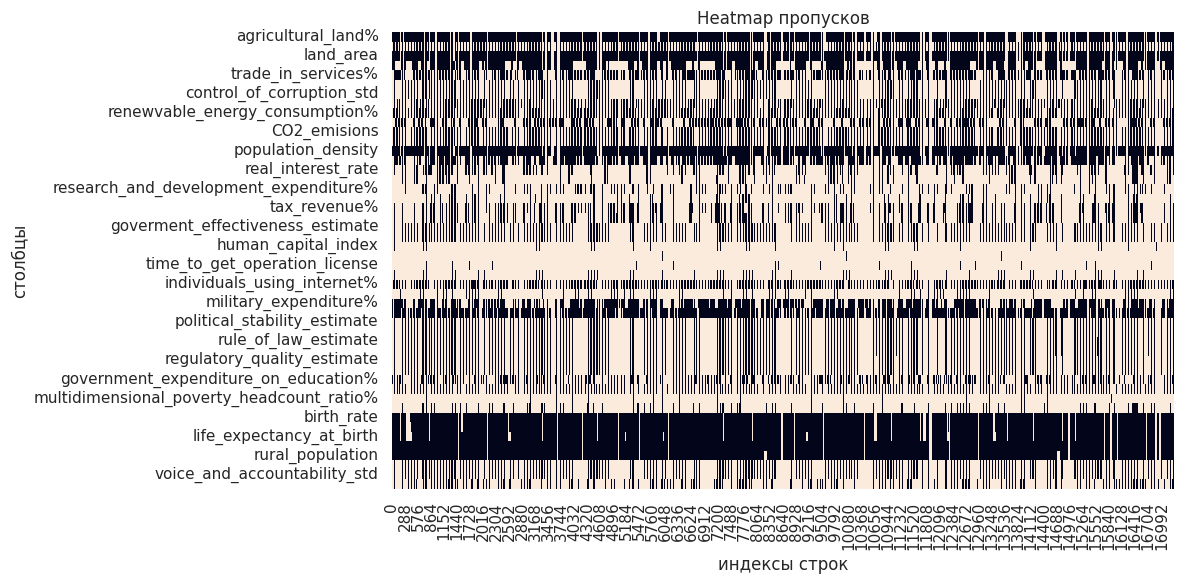

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df[numeric_cols].isna().T, cbar=False)
plt.title("Heatmap пропусков")
plt.xlabel("индексы строк")
plt.ylabel("столбцы")
plt.tight_layout()
plt.show()


вывели цветовую схему, указывающую, как много пропущенных данных в том или ином столбце БД. черный цвет означает что поле заполнено, белый - наоборот, пустое. отсюда видно, например, что в столбце time_to_get_operation_licencse практически не содержит данных и его лучше будет удалить. данные в столбцах agricultural_land% и land_area практически не содержат пропусков (их можно заполнить средними или медианными значениями).

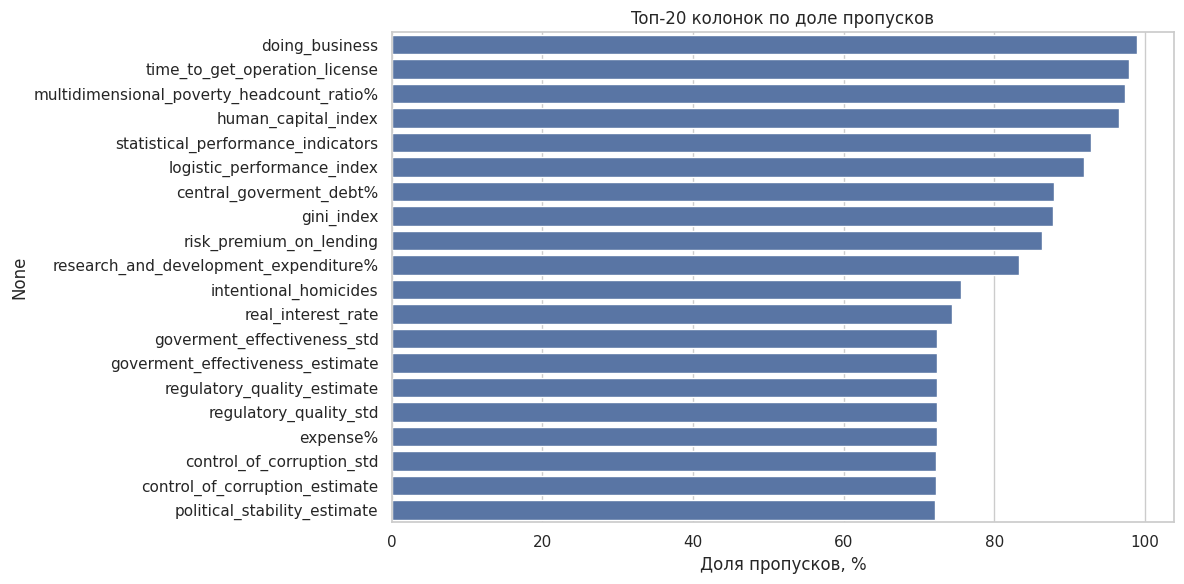

In [ ]:
# столбцовая диаграмма с процентом пропусков по столбцам
missing_rate = df.isna().mean().sort_values(ascending=False) * 100
top_missing = missing_rate.head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_missing.values, y=top_missing.index)
plt.xlabel("Доля пропусков, %")
plt.title("Toп-20 колонок по доле пропусков")
plt.tight_layout()
plt.show()


многие из этих столбцов рекомендуется удалить, т.к. они не обладают особой информативностью для глобального анализа БД ввиду высокой доли пропусков данных в них. в тех столбцах, где доля пропусков не приближена к 100%, можно попробовать провести локальный анализ, например по стране/году.

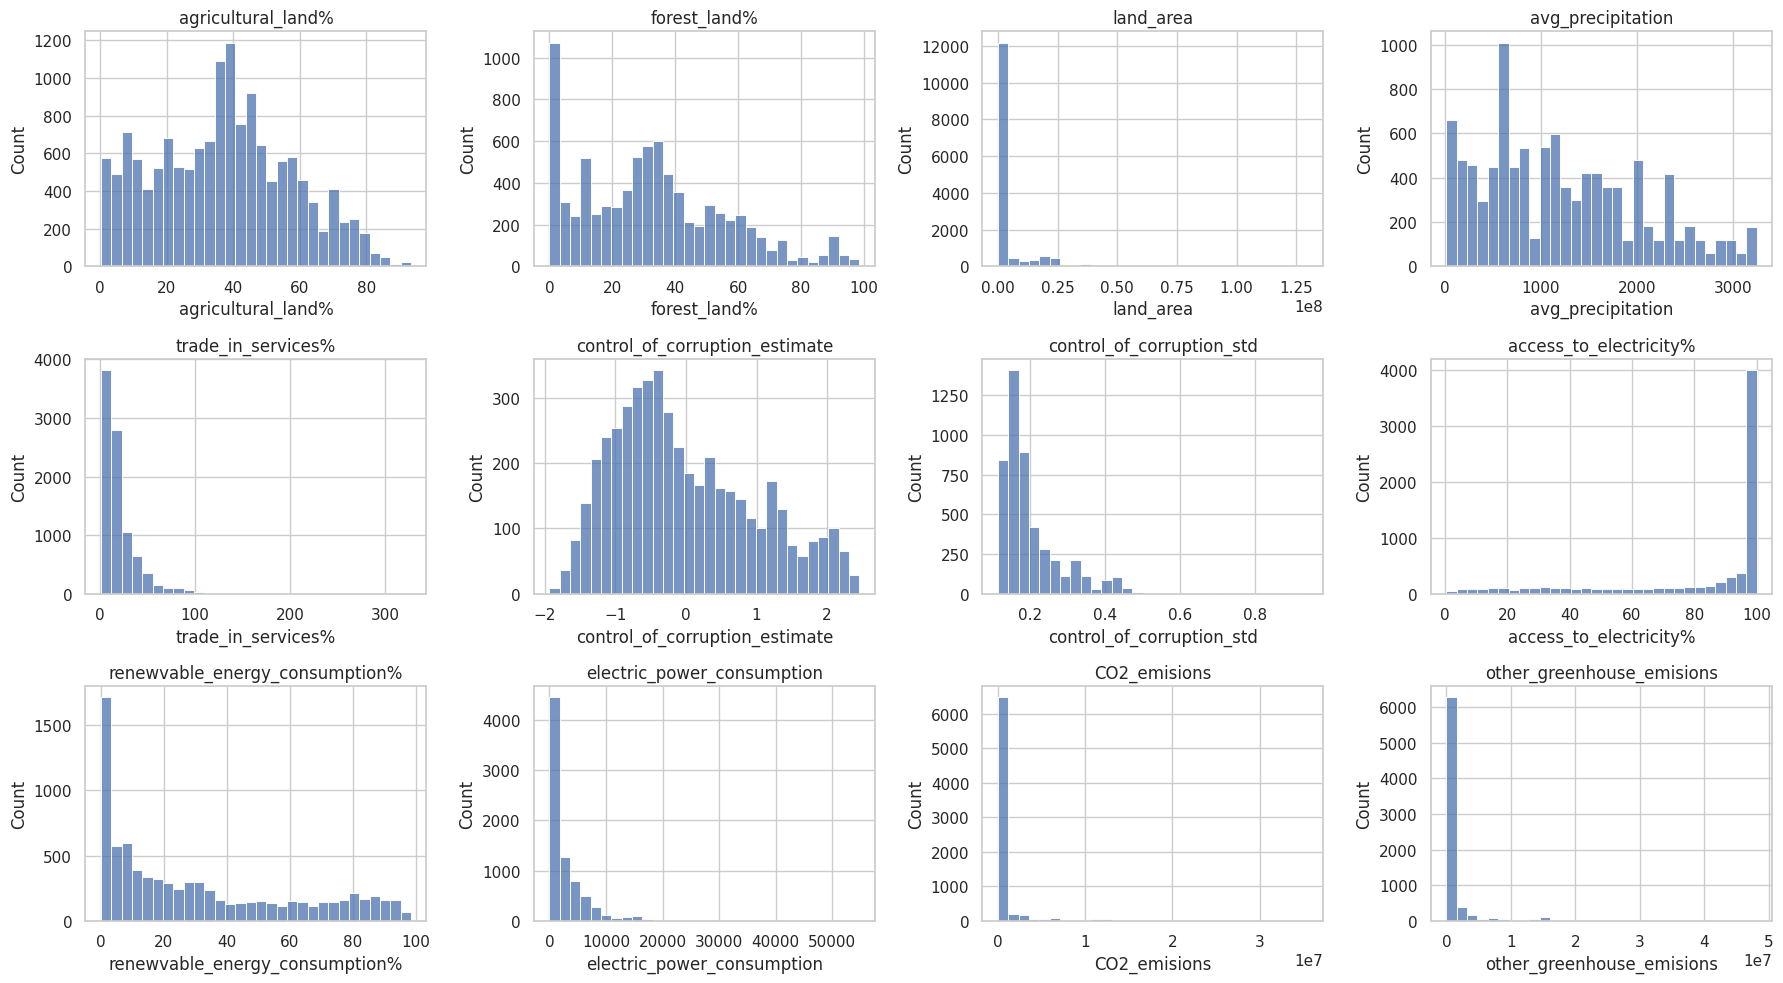

In [ ]:
# Гистограммы распределений значений
N = 12
cols = numeric_cols[:N]

fig, axes = plt.subplots(nrows=(N+3)//4, ncols=4, figsize=(18, 10))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.histplot(df[col].dropna(), bins=30, ax=ax, kde=False)
    ax.set_title(col)
plt.tight_layout()
plt.show()


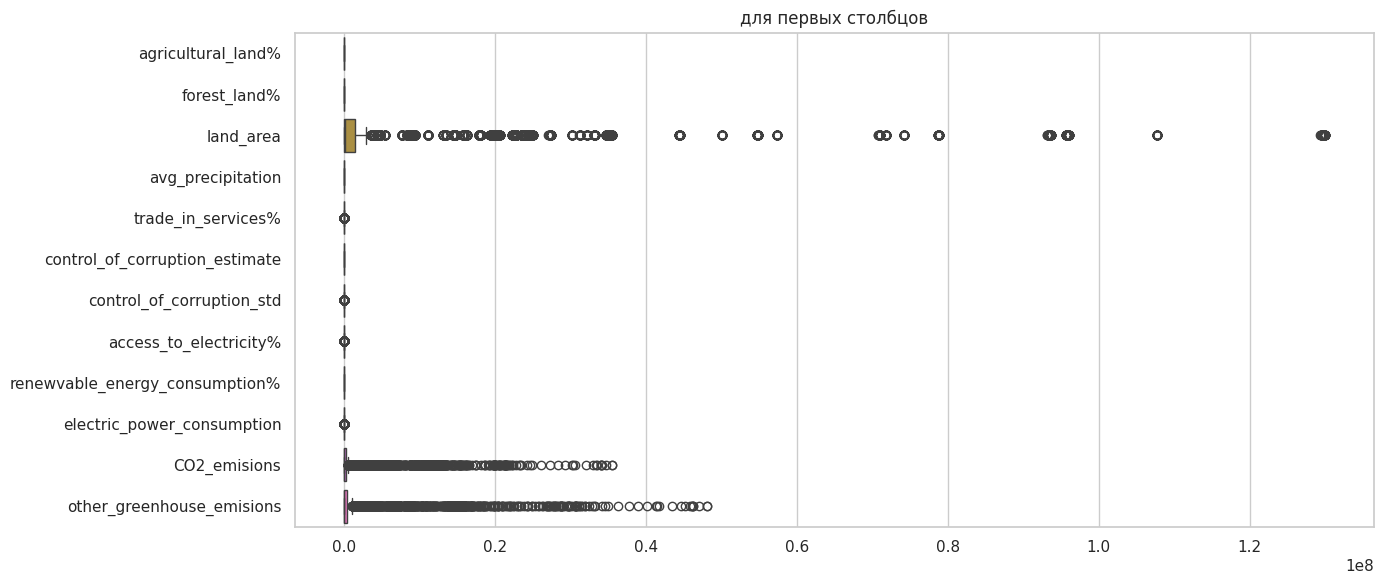

In [ ]:
# выявление выбросов
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[cols].dropna(how="all"), orient="h")
plt.title("для первых столбцов")
plt.tight_layout()
plt.show()


land_area, CO2_emissions, other_greenhouse_emissions имеют очень широкие диапазоны и множество отдельных точек (выбросов) справа, что указывает на сильное неравенство или наличие нескольких очень крупных значений.для agricultural_land%, forest_land% коробки и усы очень узкие и находятся близко к нулю, что говорит о том, что большинство значений сгруппировано в узком диапазоне.

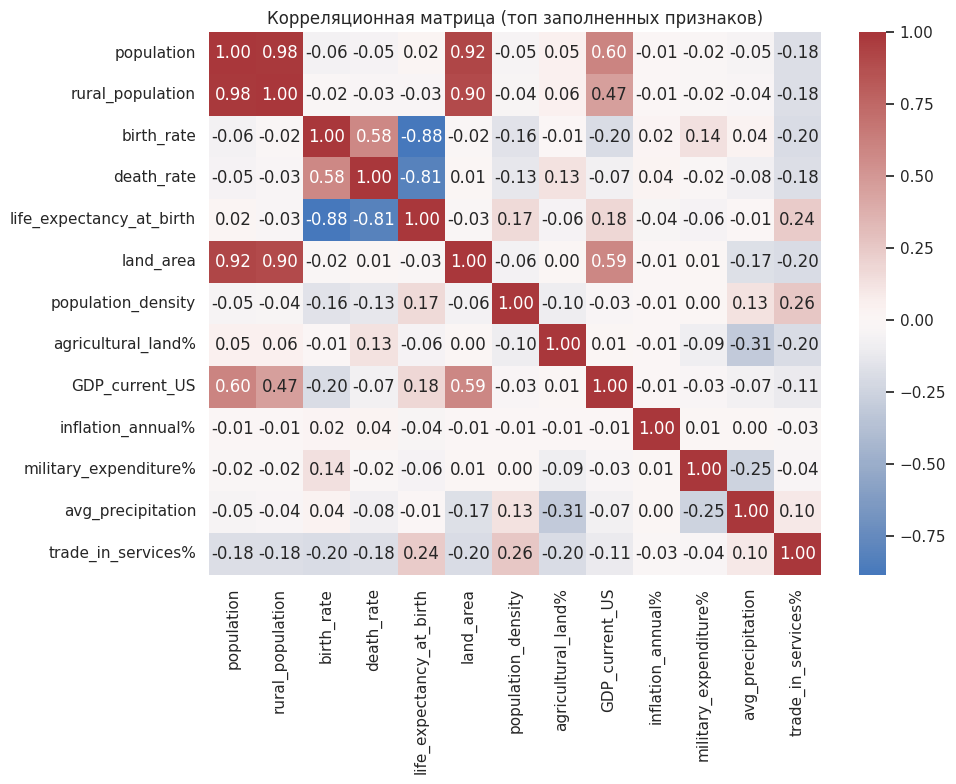

In [ ]:
# Корреляции
filled_rates = df.isna().mean().sort_values()
top_filled = filled_rates[filled_rates < 0.5].index.tolist()  # столбцы с <50% пропусков
top_filled = [c for c in top_filled if c in numeric_cols][:15]

corr = df[top_filled].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Корреляционная матрица (топ заполненных признаков)")
plt.tight_layout()
plt.show()


 видно, что демографические показатели (population, rural_population) сильно связаны между собой и с land_area. Показатели здоровья (life_expectancy, death_rate) имеют отрицательную корреляцию между собой.

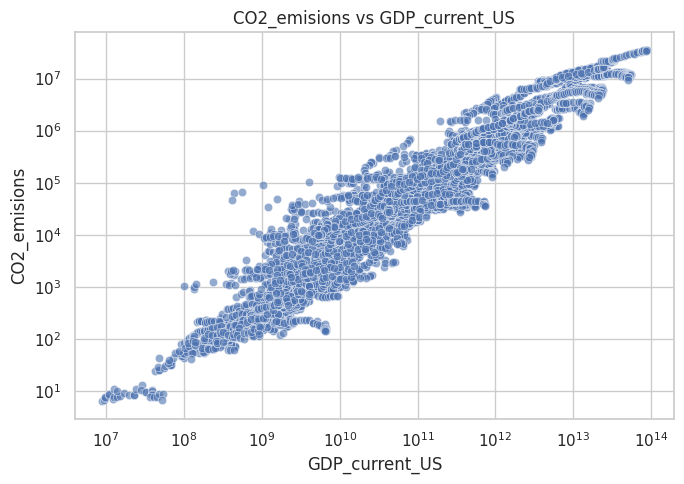

In [ ]:
x_col = "GDP_current_US"
y_col = "CO2_emisions"

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.6)
plt.xscale("log")
plt.yscale("log")
plt.title(f"{y_col} vs {x_col}")
plt.tight_layout()
plt.show()


из того, что точки на графике не разбросаны хаотично, а скопились вдоль линии тренда, мы можем сделать что выбранные для построения графика два параметра (текущий ВВП и выбросы углекислого газа) тесно связаны между собой.